In [1]:
from data import Course
from ouc_course_tool import *
from data.schedule import CourseTable
from tests.test_config import ConfigOfTest
from ouc_course_tool.core.search_param_handle import search_param_handle

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 指定中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def draw_course_table(course_list: list[Course]):
    # 定义一周的天数和每天的课程节次
    days = ['一', '二', '三', '四', '五', '六', '日']
    periods = list(map(lambda x: x - 1, list(range(1, 13)))) # 假设每天有 12 节课
    
    # 创建绘图对象
    fig, ax = plt.subplots(figsize=(10, 7))

    # 绘制课程表的背景网格
    ax.set_xlim(0, 7)
    ax.set_ylim(1, 13)
    ax.set_xticks([i for i in range(7)])
    ax.set_yticks([i for i in range(1, 13)])  # 调整 y 轴的刻度，使其与 periods 匹配
    ax.set_xticklabels(days)
    ax.set_yticklabels(periods)
    ax.grid(True)

    # 使用 colormap 生成浅色且分辨度高的颜色
    cmap = plt.colormaps['Pastel1']  # 选择 Pastel1 颜色映射
    colors = cmap(np.linspace(0, 1, len(course_list)))  # 生成 len(course_list) 个颜色

    # 绘制每门课程的块
    for i, temp_course in enumerate(course_list):
        course_name = temp_course.course_name.split(']')[1]
        if len(course_name) > 6:
            course_name = course_name[:6] + "..."
        color = colors[i]  # 为每个课程分配一种颜色
        for schedule in temp_course.get_class_time_list():  # 如果一个课程有多个时间安排
            day_index = days.index(schedule.day_of_week)
            start_period = schedule.start_period
            end_period = schedule.end_period
            
            # 在表格上绘制课程
            rect = patches.Rectangle((day_index, start_period), 1, end_period - start_period + 1, 
                                     edgecolor='black', facecolor=color, linewidth=1)
            ax.add_patch(rect)
            ax.text(day_index + 0.5, start_period + 0.5 * (end_period - start_period + 1),
                    course_name, ha='center', va='center', fontsize=10)

    # 设置标题和标签
    plt.title('课程表')
    plt.xlabel('星期')
    plt.ylabel('节次')

    # 显示图表
    plt.show()
    

导入包 和 设置绘图函数

In [3]:
test_config = ConfigOfTest('./tests/test_resource/account_local.ini')
tesseract_cmd_path = 'D:/Tools/Tesseract/tesseract.exe'

login_config = LoginConfig(test_config.get_username(), test_config.get_password(), tesseract_cmd_path)

设置 Tesseract 图片识别软件
EXAMPLE DOWNLOAD URL: https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-5.3.4.20240503.exe

设置 全局变量（包括账号和密码）
设置 登录配置


In [1]:
session_id = AccountValidation(login_config).get_login_session_id()
print(session_id)

NameError: name 'AccountValidation' is not defined

获取登录 ID

In [7]:
fetcher_config = CourseFetcherConfig(session_id=session_id)
course_fetcher = CourseFetcher(config=fetcher_config)

设置 搜索配置

In [11]:
target_course = [
    '围棋-选修',
    '概率-公共',
    '形势与政策-公共',
    '毛泽东思想-公共',
    '网球-公共',
    '离散数学-智能科学-2023',
    '计算机系统基础-智能科学-2023',
    '人工智能先导实践-智能科学-2023',
    '人工智能导论-智能科学-2022',
    '机器人学导论-智能科学-2022',
]
mul_params = search_param_handle(target_course, campus=3, year_and_term='2024-1')
courses_list = course_fetcher.get_courses_from_mul_params(mul_params)

目标选课

围棋与中国文化
07001044 齐祥明

概率统计
16001079 王雯

形势与政策-2024秋
19000180 梁山

毛泽东思想和中国特色社会主义理论体系概论
19000017 隋筱童

体育(初级网球)
18003234 外聘(体育)

离散数学Ⅱ
02003004 马慧

计算机系统基础
02003110 范浩

人工智能先导实践
02003066 徐建良

人工智能导论
02003125 贺佩兰

机器人学导论
02003012 梁馨月



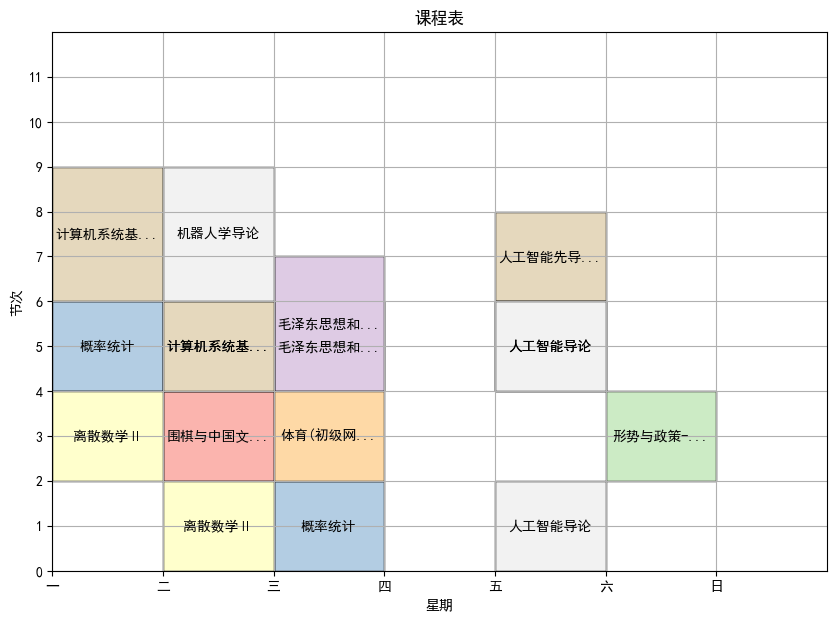

In [27]:
importance_course = [
    '离散数学',
    '概率统计',
    '人工智能导论',
    '围棋'
]

unnecessary_course = [
    '篮球',
    '足球',
]

def is_in_course(target, course_list):
    for temp_course in course_list:
        if temp_course in target:
            return True

def limit_function(course):
    
    # 重要的不限制的课
    if is_in_course(course.course_name, importance_course):
        return False
    
    # 不要的课
    if is_in_course(course.course_name, unnecessary_course):
        return True
    
    # 超人数 不选
    if float(course.limit) < int(course.selected_count) * 1:
        return True
    
    # 早八不选
    for time in course.get_class_time_list():
        if time.start_period == 1:
            return True
        
table = CourseTable.calculate_course(courses_list, limit_function)
# table = CourseTable.calculate_course(courses_list, None)
table.print_courses()

selection_number_list = map(lambda temp_course: int(temp_course.selection_number), table.selected_courses)
selection_number_list = sorted(list(selection_number_list), reverse=True)

draw_course_table(table.selected_courses)

设置限制函数 并且 获得课程表

In [8]:
common_params = CourseFetcherParams()
common_params.set_keyword('计算机系统基础')
common_params.sel_nj = 2023

result: list[Course] = course_fetcher.get_courses_by_params(common_params)

for course in result:
    print(course.get_class_time_list())

[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 四 (1-2节) 每周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 四 (1-2节) 每周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 单周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 双周]
[周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 一 (7-9节) 每周, 周次: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] 星期: 二 (5-6节) 每周]
